In [4]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import json

%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 노란색 글씨의 warining 문구 강제 생략
import warnings
warnings.filterwarnings(action='ignore')
    

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


print('numpy version - ' , np.__version__)
print('pandas version - ' , pd.__version__)


    

numpy version -  1.21.5
pandas version -  1.4.2


#### 학습 목표
- 시각화 패키지 matplotlib
- 서브 패키지 pyploy
- 고급 시각화 seaborn
- 지도 시각화 folium
- 현업 (BI) - Tableau

Plot 유형
- line : 데이터가 시간, 순서 등에 따라서 어떻게 변화하는지를 보여주는 시각화
- area
- surface
- bar
- hist
- box etc....

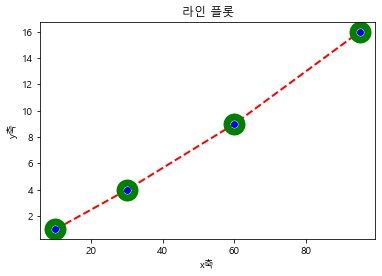

In [24]:
# 그림판 준비
plt.figure()
# 타이틀
plt.title('라인 플롯')
# 직선 도표 그리기
# 의미없는 그림 - x,y축이 없다.
# plt.plot([1,2,3,4,5,6,7,8,9])
# plt.plot([1,21,3,41,5,61,7,8,91])
# plt.plot([11,1,31,4,51,6,71,81,9])

# plot에 옵션 주기
# c = ''  color
# lw = '' linewidth
# ls = '' linestyle
# marker = '' marker
# ms = '' marker size
# mec = '' marker line color
# mew = '' marker round width
# mfc = '' marker fill color

plt.plot([10,30,60,95] , [1,4,9,16] 
         , c = 'red' 
         , lw = 2 
         , ls = '--'
         , marker ='o' 
         , ms = '7' 
         , mec = 'g'
         , mew = 15
         , mfc = 'blue') 

# 라벨링
plt.xlabel('x축')
plt.ylabel('y축')



# 그림판 보여주기
plt.show()
# 그림판 닫기
plt.close()

In [ ]:
- 시도별 전출입 인구수.xlsx 이용한 라인플롯
- header , fillna


In [37]:
tmp_frm = pd.read_excel('C:/Users/a/Documents/SQL/data/visual/시도별 전출입 인구수.xlsx' 
                        , header = 0 )
tmp_frm.head()



,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,NaN,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,NaN,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0


In [41]:
# nan으로 비어있는 값을 첫번째 값으로 채운다.

tmp_frm = tmp_frm.fillna(method = 'ffill')
tmp_frm.head()


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,전국,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,전국,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0


In [79]:
print('서울에서 다른 지역으로 이동한 데이터만 추출하여 서브셋 만들기')

서울에서 다른 지역으로 이동한 데이터만 추출하여 서브셋 만들기


In [81]:
tmp_frm[(tmp_frm['전출지별'] == '서울특별시') & tmp_frm['전입지별'] != '서울특별시'].head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536.0,4210164.0,3687938.0,4860418.0,5297969.0,9011440.0,6773250.0,7397623.0,...,8808256.0,8487275.0,8226594.0,8127195.0,7506691.0,7411784.0,7629098.0,7755286.0,7378430.0,7154226.0
2,전국,서울특별시,1742813.0,1671705.0,1349333.0,1831858.0,2050392.0,3396662.0,2756510.0,2893403.0,...,2025358.0,1873188.0,1733015.0,1721748.0,1555281.0,1520090.0,1573594.0,1589431.0,1515602.0,1472937.0
3,전국,부산광역시,448577.0,389797.0,362202.0,482061.0,680984.0,805979.0,724664.0,785117.0,...,514502.0,519310.0,519334.0,508043.0,461042.0,478451.0,485710.0,507031.0,459015.0,439073.0
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938.0,398626.0,370817.0,370563.0,348642.0,351873.0,350213.0,351424.0,328228.0,321182.0


In [101]:
tmp_frm[tmp_frm['전입지별'] == '서울특별시'].index
seoul_frm = tmp_frm[tmp_frm['전출지별'] == '서울특별시'][tmp_frm[tmp_frm['전출지별'] == '서울특별시']['전입지별'] != '서울특별시']
seoul_frm

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,서울특별시,전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
21,서울특별시,부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
22,서울특별시,대구광역시,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
23,서울특별시,인천광역시,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
24,서울특별시,광주광역시,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
25,서울특별시,대전광역시,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
26,서울특별시,울산광역시,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
27,서울특별시,세종특별자치시,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
28,서울특별시,경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0
29,서울특별시,강원도,9352.0,12885.0,13561.0,16481.0,15479.0,27837.0,25927.0,25415.0,...,23668.0,23331.0,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0


In [102]:
seoul_frm.drop('전출지별' , axis = 1 , inplace = True)
seoul_frm.rename(columns = {seoul_frm.columns[0] : '전입지'} , inplace = True)
seoul_frm

,전입지,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
19,전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
21,부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
22,대구광역시,-,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
23,인천광역시,-,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
24,광주광역시,-,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
25,대전광역시,-,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
26,울산광역시,-,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
27,세종특별자치시,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
28,경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,237684.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0
29,강원도,9352.0,12885.0,13561.0,16481.0,15479.0,27837.0,25927.0,25415.0,26700.0,...,23668.0,23331.0,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0


In [103]:
seoul_frm.set_index('전입지' , inplace=True)
seoul_frm

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985.0,1419016.0,1210559.0,1647268.0,1819660.0,2937093.0,2495620.0,2678007.0,3028911.0,2441242.0,...,2083352.0,1925452.0,1848038.0,1834806.0,1658928.0,1620640.0,1661425.0,1726687.0,1655859.0,1571423.0
부산광역시,11568.0,11130.0,11768.0,16307.0,22220.0,27515.0,23732.0,27213.0,29856.0,28542.0,...,17353.0,17738.0,17418.0,18816.0,16135.0,16153.0,17320.0,17009.0,15062.0,14484.0
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720.0,10464.0,10277.0,10397.0,10135.0,10631.0,10062.0,10191.0,9623.0,8891.0
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493.0,45392.0,46082.0,51641.0,49640.0,47424.0,43212.0,44915.0,43745.0,40485.0
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846.0,11725.0,11095.0,10587.0,10154.0,9129.0,9759.0,9216.0,8354.0,7932.0
대전광역시,-,-,-,-,-,-,-,-,-,-,...,13515.0,13632.0,13819.0,13900.0,14080.0,13440.0,13403.0,13453.0,12619.0,11815.0
울산광역시,-,-,-,-,-,-,-,-,-,-,...,5057.0,4845.0,4742.0,5188.0,5691.0,5542.0,6047.0,5950.0,5102.0,4260.0
세종특별자치시,-,-,-,-,-,-,-,-,-,-,...,-,-,-,-,2998.0,2851.0,6481.0,7550.0,5943.0,5813.0
경기도,130149.0,150313.0,93333.0,143234.0,149045.0,253705.0,202276.0,207722.0,237684.0,278411.0,...,412408.0,398282.0,410735.0,373771.0,354135.0,340801.0,332785.0,359337.0,370760.0,342433.0


In [107]:
# 경기도 전입 인구 데이터 추출


seoul_frm.loc[['경기도']]

data_series = seoul_frm.loc['경기도']
print('type ' , type(data_series))
print()
print('index' , data_series.index) 
print()
print('values' , data_series.values)

type  <class 'pandas.core.series.Series'>

index Index(['1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017'],
      dtype='object')

values [130149.0 150313.0 93333.0 143234.0 149045.0 253705.0 202276.0 207722.0
 237684.0 278411.0 297539.0 252073.0 320174.0 400875.0 352238.0 390265.0
 412535.0 405220.0 415174.0 412933.0 473889.0 384714.0 428344.0 502584.0
 542204.0 599411.0 520566.0 495454.0 407050.0 471841.0 435573.0 499575.0
 516765.0 457656.0 400206.0 414621.0 449632.0 431637.0 412408.0 398282.0
 410735.0 373771.0 354135.0 340801.0 332785.0 359337.0 370760.0 342433.0]


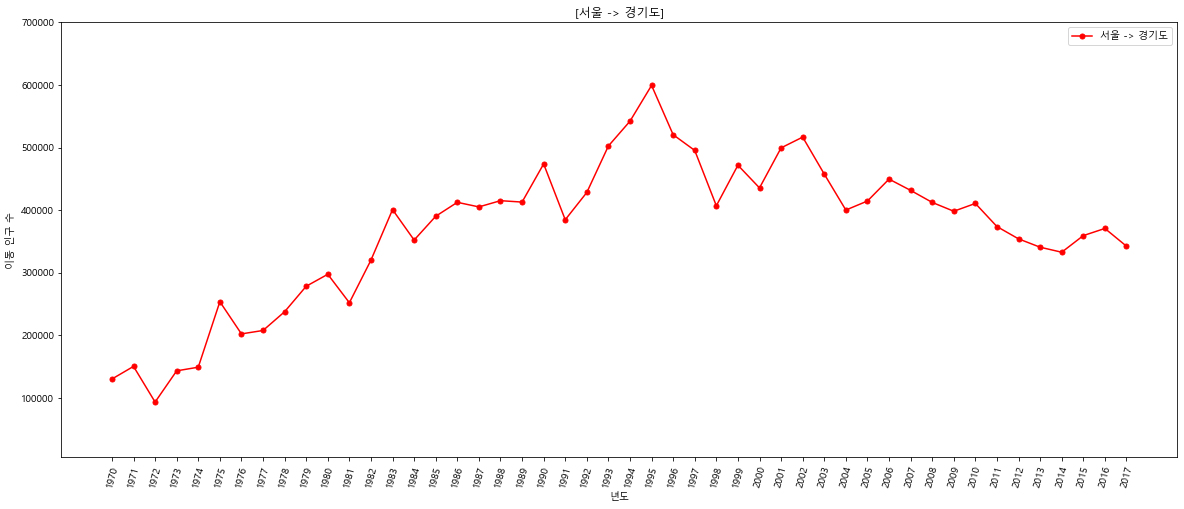

In [128]:
# 서울->경기도 인구 이동 시각화

plt.figure(figsize = (20 , 8))
plt.plot(data_series.index , data_series.values
        , marker = 'o'
        , c = 'red'
        , ms = '5')

# option

plt.title('[서울 -> 경기도]')
plt.xlabel('년도')
plt.ylabel('이동 인구 수')

# 범례

plt.legend(labels=['서울 -> 경기도'] , loc = 'best')

# xlim , ylim 범위

plt.ylim(5000 , 700000)

# xtick x축 문자를 특정 각도로 회전시킨다.

plt.xticks(rotation = 75)

plt.show()
plt.close()



In [130]:
seoul_frm.index

Index(['전국', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시',
       '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지')

In [131]:
data_keanki = seoul_frm.loc['경기도']
data_chuncharn_south = seoul_frm.loc['충청남도']
data_kunhsang = seoul_frm.loc['경상북도']
data_junra_seouth = seoul_frm.loc['전라남도']

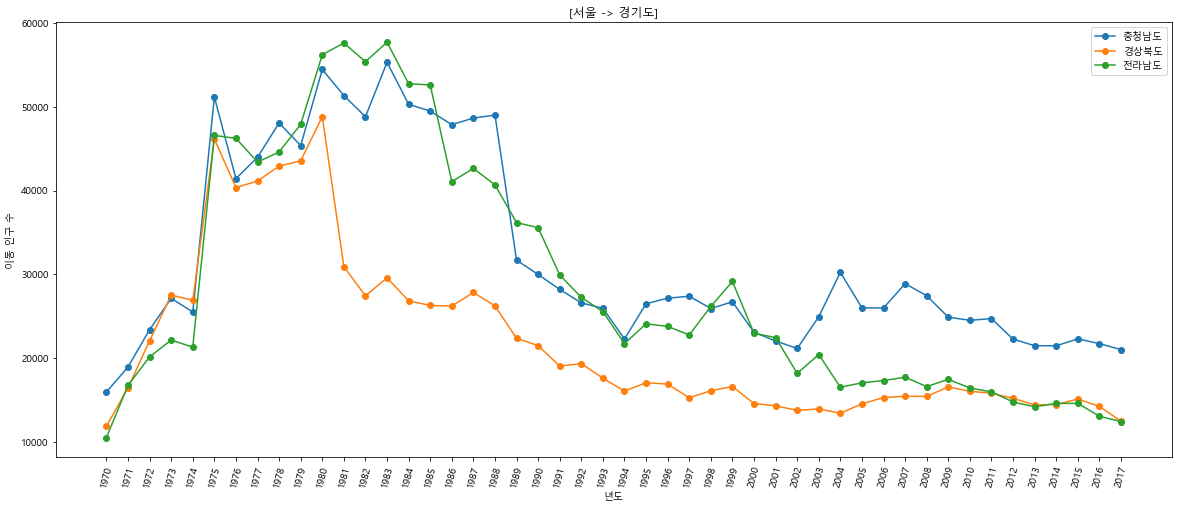

In [141]:
# 충청남도 , 경상북도, 전라남도 추가

# 서울->경기도 인구 이동 시각화

plt.figure(figsize = (20 , 8))

for area in ['충청남도' , '경상북도' , '전라남도'] :
    plt.plot(seoul_frm.loc[area].index , seoul_frm.loc[area].values
        , marker = 'o' , label = area)
    
# option

plt.title('[서울 -> 경기도]')
plt.xlabel('년도')
plt.ylabel('이동 인구 수')

# 범례

plt.legend(loc = 'best')

# xlim , ylim 범위

plt.ylim()

# xtick x축 문자를 특정 각도로 회전시킨다.

plt.xticks(rotation = 75)

plt.show()
plt.close()



### subplot()
- 보드를 분할하여 다양한 그래프를 볼 수 있다.
- plt.subplot(2, 1, 1)                # nrows=2, ncols=1, index=1

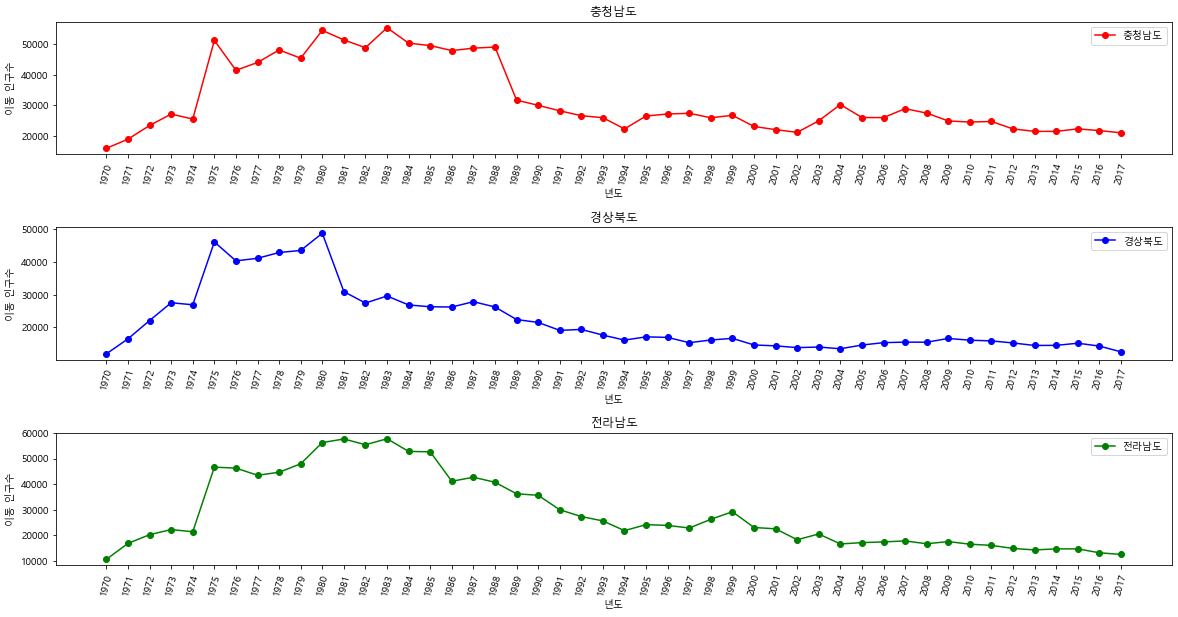

In [166]:
# subplot 생성시 변수를 생성하도록 하자.
fig = plt.figure(figsize = (20,10))
# 서브플롯 간격 조절
# plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.subplots_adjust(hspace=0.55)

# 1행 2열의 1번째 그래프
area01 = fig.add_subplot(3,1,1)
# 1행 2열의 2번째 그래프
area02 = fig.add_subplot(3,1,2)
# 1행 2열의 3번째 그래프
area03 = fig.add_subplot(3,1,3)


# subplot.set_title() 서브플롯 각각의 타이틀 설정
# subplot.set_xlabel , subplot.set_ylabel
for area , num  , color in zip(['충청남도' , '경상북도' , '전라남도'] , [area01 , area02 , area03] , ['red' , 'blue' , 'green']) :
    num.plot(seoul_frm.loc[area].index , seoul_frm.loc[area].values, marker = 'o' , label = area , c = color)
    num.set_xlabel('년도')
    num.set_ylabel('이동 인구수')
    num.set_title(area)
    num.legend(loc = 'best')
    num.set_xticklabels(labels = seoul_frm.columns.values , rotation = 75)
    
    
plt.show()
plt.close()

In [168]:
# 내장데이터로 가지고 놀기
import seaborn as sns
iris_frm = sns.load_dataset('iris')
titanic_frm = sns.load_dataset('titanic')

- bar plot : x축이 범주형 

In [185]:
print('타이타닉 선실별 생존자 합 구하기')
print('선실 등급에 따른 생존자 수를 시각화 - barplot')

타이타닉 선실별 생존자 합 구하기
선실 등급에 따른 생존자 수를 시각화 - barplot


In [192]:
titanic_frm.groupby('pclass').survived.sum()

pclass
1    136
2     87
3    119
Name: survived, dtype: int64

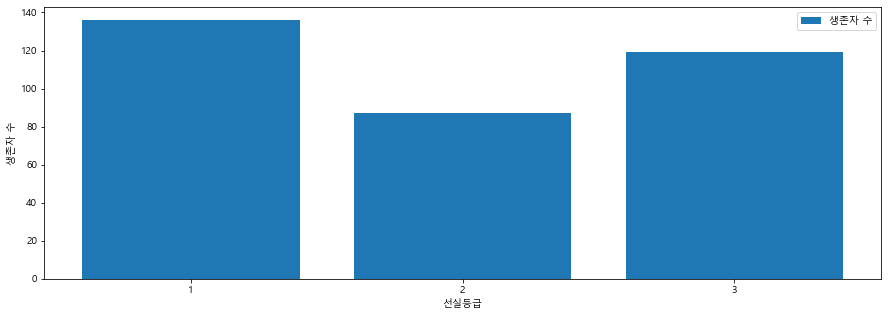

In [201]:
titanic_frm.groupby('pclass').survived.sum()

plt.figure(figsize = (15 , 5))
plt.bar(titanic_frm.groupby('pclass').survived.sum().index , titanic_frm.groupby('pclass').survived.sum().values , label = '생존자 수')

# option
plt.xlabel('선실등급')
plt.ylabel('생존자 수')
plt.xticks(titanic_frm.groupby('pclass').survived.sum().index)
plt.legend(loc = 'best')

plt.show()
plt.close()


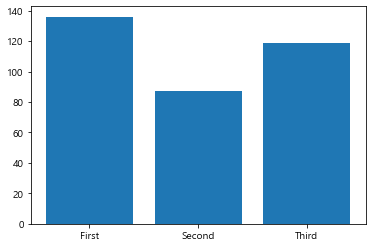

In [199]:
survived_frm = titanic_frm.groupby(['survived' , 'class']).count().loc[1]['alive']
plt.bar(survived_frm.index , survived_frm.values)
plt.show()
plt.close()

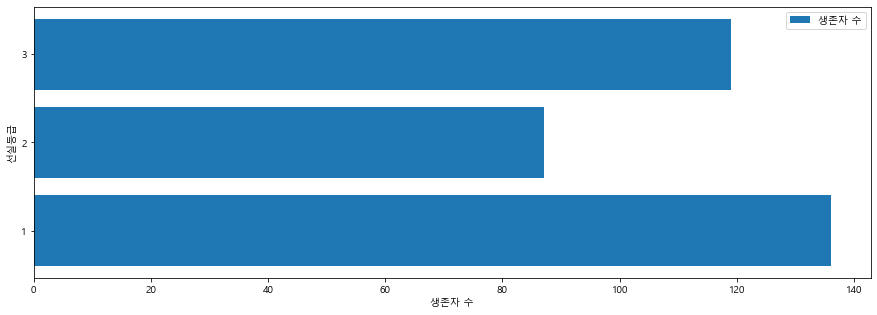

In [204]:
titanic_frm.groupby('pclass').survived.sum()

plt.figure(figsize = (15 , 5))
plt.barh(titanic_frm.groupby('pclass').survived.sum().index , titanic_frm.groupby('pclass').survived.sum().values , label = '생존자 수')

# option
plt.ylabel('선실등급')
plt.xlabel('생존자 수')
plt.yticks(titanic_frm.groupby('pclass').survived.sum().index)
plt.legend(loc = 'best')

plt.show()
plt.close()


In [262]:
# 서브셋
# 조건 1 - 충청남도 , 경상북도, 강원도 , 전라남도
# 조건 2 - 연도 2010 ~ 2017
# 문제 - 년도에 따른 권역별 인구 전입 수 시각화
# 'best'0
# 'upper right'1
# 'upper left'2
# 'lower left'3
# 'lower right'4
# 'right'5
# 'center left'6
# 'center right'7
# 'lower center'8
# 'upper center'9
# 'center'10

<Figure size 432x288 with 0 Axes>

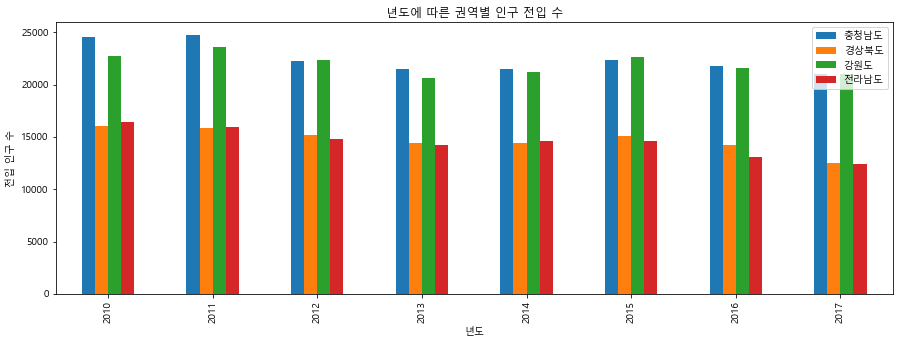

<function matplotlib.pyplot.close(fig=None)>

In [282]:
t_subset_frm = area_subset_frm.T
t_subset_frm

plt.figure()
t_subset_frm.plot(kind = 'bar' , figsize = (15,5))

# option
plt.title('년도에 따른 권역별 인구 전입 수')
plt.xlabel('년도')
plt.ylabel('전입 인구 수')

plt.legend(loc = 'upper right')

plt.show()
plt.close


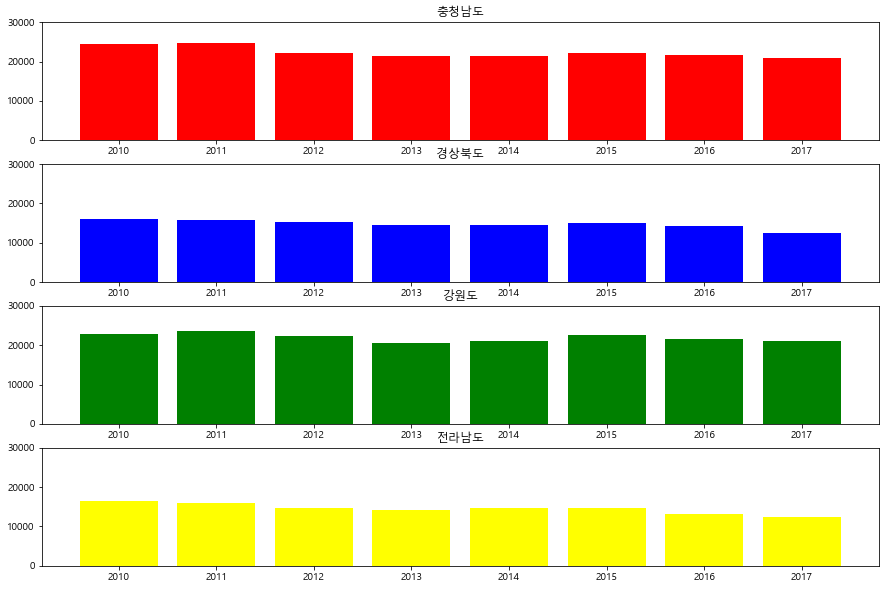

In [277]:
area = ['충청남도' , '경상북도' , '강원도' , '전라남도']
year = ['2010' , '2011' , '2012' , '2013' , '2014' , '2015' , '2016' , '2017']


area_subset_frm = seoul_frm.loc[area][year]
area_subset_frm

# 년도에 따른 권역별 인구 전입 수 시각화


fig = plt.figure(figsize=(15,10))
# 1행 2열의 1번째 그래프
area01 = fig.add_subplot(4,1,1)
# 1행 2열의 2번째 그래프
area02 = fig.add_subplot(4,1,2)
# 1행 2열의 3번째 그래프
area03 = fig.add_subplot(4,1,3)
# 1행 2열의 4번째 그래프
area04 = fig.add_subplot(4,1,4)

space = [area01 , area02 , area03 , area04]
for i , num ,area , color in zip(area , range(1, len(area)+1) , space , ['red' , 'blue' , 'green' , 'yellow']) :
    area.bar(area_subset_frm.loc[i].index , area_subset_frm.loc[i].values , color = color)
    area.set_title(i)
    area.set_ylim(0,30000)

plt.show()
plt.close()

In [255]:
area_subset_frm

,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,
충청남도,24522.0,24723.0,22269.0,21486.0,21473.0,22299.0,21741.0,21020.0
경상북도,16042.0,15818.0,15191.0,14420.0,14456.0,15113.0,14236.0,12464.0
강원도,22736.0,23624.0,22332.0,20601.0,21173.0,22659.0,21590.0,21016.0
전라남도,16429.0,15974.0,14765.0,14187.0,14591.0,14598.0,13065.0,12426.0


In [222]:
str(list(range(2010,2018))[0])

'2010'

In [251]:
area = ['충청남도' , '경상북도' , '강원도' , '전라남도']
year = ['2010' , '2011' , '2012' , '2013' , '2014' , '2015' , '2016' , '2017']
area_subset_frm = seoul_frm.loc[area][year]
area_subset_frm

# 년도에 따른 권역별 인구 전입 수 시각화


for i , num in zip(area , range(1, len(area)+1)) :
    fig.add_subplot(len(area),1,num).bar(area_subset_frm.loc[i].index , area_subset_frm.loc[i].values)

plt.show()
plt.close()

In [283]:
t_subset_frm

전입지,충청남도,경상북도,강원도,전라남도
2010,24522.0,16042.0,22736.0,16429.0
2011,24723.0,15818.0,23624.0,15974.0
2012,22269.0,15191.0,22332.0,14765.0
2013,21486.0,14420.0,20601.0,14187.0
2014,21473.0,14456.0,21173.0,14591.0
2015,22299.0,15113.0,22659.0,14598.0
2016,21741.0,14236.0,21590.0,13065.0
2017,21020.0,12464.0,21016.0,12426.0


In [326]:
# 권역별 합계 추가 
# 권역별 합계가 가장 많은 권역값을 정렬, 수평막대그래프 시각화

In [337]:
data

In [332]:
data['2010'].values
data['2010'].index

array([24522.0, 22736.0, 16042.0, 16429.0], dtype=object)

In [329]:
year

for i , color in zip(year , ['red' , 'orange' , 'yellow' , 'green' ,'blue' , 'navy' , 'purple' , 'gray']) :
    plt.bar(data[i].index ,data[i].values , color = color)

['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

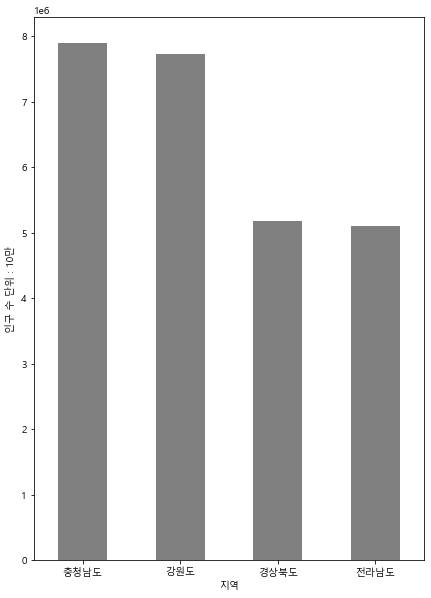

In [353]:
area_subset_frm['합계'] = area_subset_frm.sum(axis=1)
data = area_subset_frm.sort_values('합계' , ascending = False)
plt.figure(figsize = (7 , 10))
data['합계'].plot(kind = 'bar' , color = ['gray'])
# for i , color in zip(year , ['red' , 'orange' , 'yellow' , 'green' ,'blue' , 'navy' , 'purple' , 'gray']) :
#     plt.bar(data[i].index ,data[i].values , color = color)
plt.xlabel('지역')
plt.ylabel('인구 수 단위 : 10만')
plt.xticks(rotation = 0)

plt.show()
plt.close()

<BarContainer object of 4 artists>

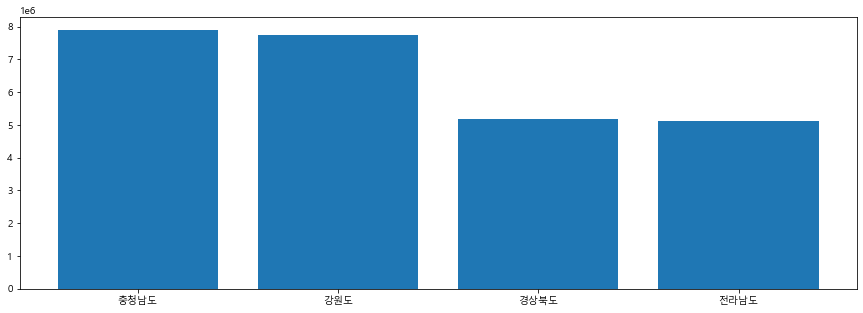

In [355]:
plt.figure(figsize = (15,5))
plt.bar(data.index ,
       data['합계'].values)

In [360]:
### 조건
print('종을 기준으로 그룹화하여 각 그룹의 평균을 구해서 시각화 한다면? - ')
print('조건 rename - sepal_length -> 꽃받침길이 sepal_width -> 꽃받침넓이 petal_length -> 꽃잎길이 petal_width -> 꽃잎넓이')
print('kind - bar')


종을 기준으로 그룹화하여 각 그룹의 평균을 구해서 시각화 한다면? - 
조건 rename - sepal_length -> 꽃받침길이 sepal_width -> 꽃받침넓이 petal_length -> 꽃잎길이 petal_width -> 꽃잎넓이
kind - bar


In [361]:
iris_frm

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


,꽃받침길이,꽃밪침넓이,꽃잎길이,꽃잎넓이
Y,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


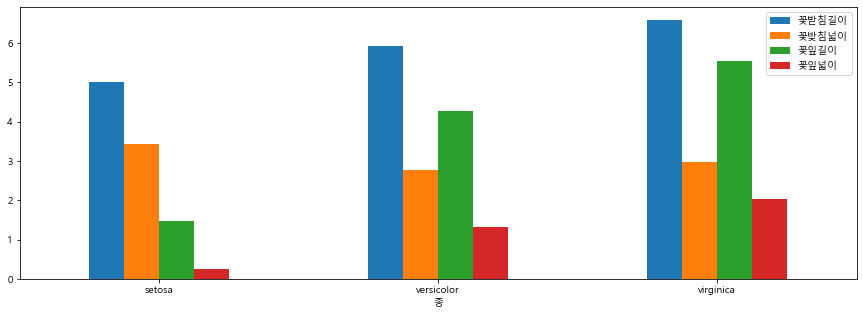

<function matplotlib.pyplot.close(fig=None)>

In [389]:
iris_species_frm = iris_frm.groupby('species').agg(np.mean)
iris_species_frm.rename(columns = {iris_species_frm.columns[0] : '꽃받침길이' 
                                   , iris_species_frm.columns[1] : '꽃밪침넓이' 
                                   , iris_species_frm.columns[2] : '꽃잎길이'
                                   , iris_species_frm.columns[3] : '꽃잎넓이'} , 
                        inplace=True) 
iris_species_frm.index.name = 'Y'
display(iris_species_frm)


iris_species_frm.plot(kind='bar' , figsize = (15,5))
plt.xlabel('종')
plt.xticks(rotation=0)
plt.show()
plt.close

In [399]:
iris_frm.rename(columns = {iris_frm.columns[0] : '꽃받침길이' 
                                   , iris_frm.columns[1] : '꽃밪침넓이' 
                                   , iris_frm.columns[2] : '꽃잎길이'
                                   , iris_frm.columns[3] : '꽃잎넓이'
                                   , iris_frm.columns[4] : 'Y'} , inplace = Tre)

In [400]:
iris_frm

,꽃받침길이,꽃밪침넓이,꽃잎길이,꽃잎넓이,Y
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


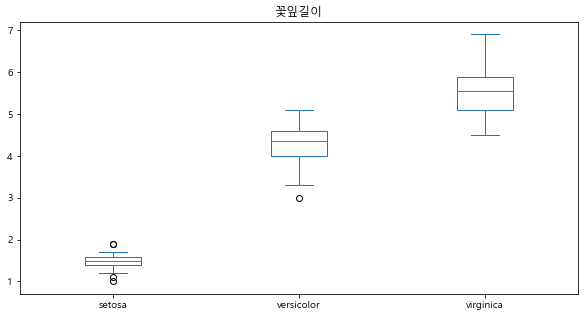

In [405]:
iris_frm[['꽃잎길이' , 'Y']].plot(by='Y' , kind = 'box' ,figsize = (10,5))
plt.show()
plt.close()

In [413]:
tmp_frm_02 = pd.read_excel('C:/Users/a/Documents/SQL/data/visual/남북한발전전력량.xlsx' 
                        , header = 0 )
tmp_frm_02 = tmp_frm_02.fillna(method = 'ffill')
tmp_frm_02

,전력량 (억㎾h),발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,북한,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


In [416]:
tmp_frm_02.rename(columns = {tmp_frm_02.columns[0] : '국가'} , inplace=True)
tmp_frm_02

,국가,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,-,-,-,-,-,-,-,-,...,-,-,-,-,-,86,118,151,173,195
5,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
6,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
7,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
8,북한,원자력,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


- plot
- bar
- box
- 

In [446]:
# 남한 / 북한 전력 합계 비교

south = tmp_frm_02[tmp_frm_02['국가'] == '남한']
north = tmp_frm_02[tmp_frm_02['국가'] == '북한']
plt.figure()
plt.plot(south[south['발전 전력별']=='합계'].drop(['발전 전력별' , '국가'] , axis = 1)
         , south.drop(['발전 전력별' , '국가'] , axis = 1).columns)
south
plt.show()
plt.close()

In [501]:
sub_north = north[north['발전 전력별'] == '합계'].drop(['국가' , '발전 전력별'] , axis = 1).T
sub_north.rename(columns = {5 : '총량'} , inplace=True)


In [495]:
sub_south = south[south['발전 전력별']=='합계'].drop(['발전 전력별' , '국가'] , axis = 1).T
sub_south.rename(columns = {0 : '총량'} , inplace=True)

In [490]:
sub_south.index

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [491]:
sub_south.values

array([[1077],
       [1186],
       [1310],
       [1444],
       [1650],
       [1847],
       [2055],
       [2244],
       [2153],
       [2393],
       [2664],
       [2852],
       [3065],
       [3225],
       [3421],
       [3646],
       [3812],
       [4031],
       [4224],
       [4336],
       [4747],
       [4969],
       [5096],
       [5171],
       [5220],
       [5281],
       [5404]], dtype=object)

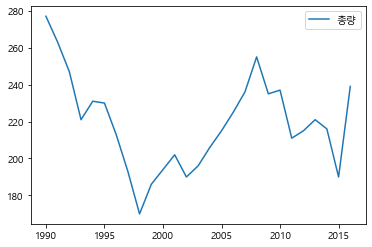

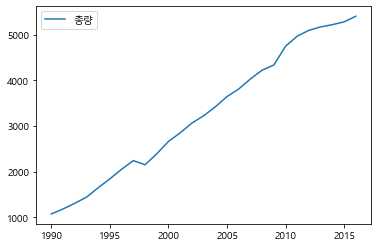

In [508]:

# dataframe일 경우 
sub_north.plot(kind = 'line')
sub_south.plot(kind = 'line')
plt.show()
plt.close()



#plt.figure(sub_south.index , sub_south.values)


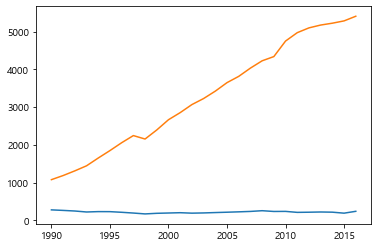

In [506]:

# series일 경우
sub_north['총량'].plot(kind = 'line')
sub_south['총량'].plot(kind = 'line')
plt.show()
plt.close()

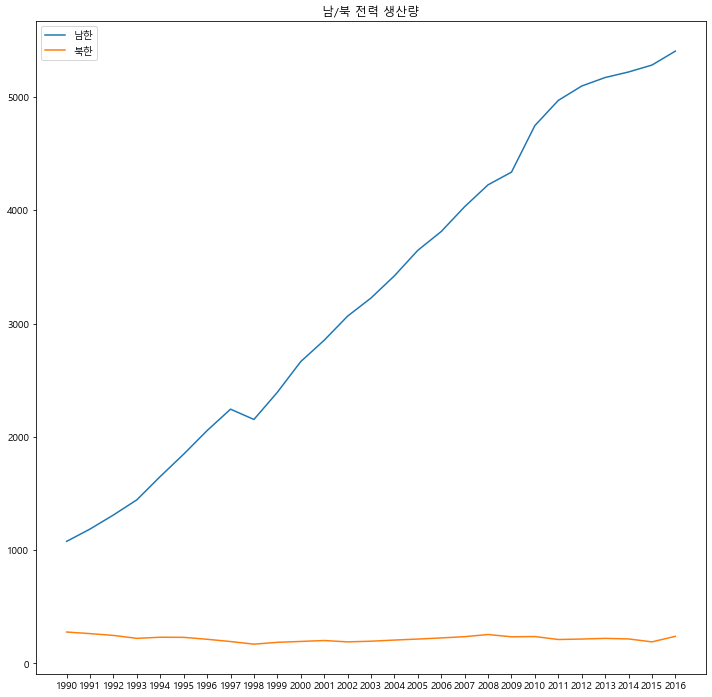

In [516]:
plt.figure(figsize = (12,12))
plt.plot(sub_south , label = '남한')
plt.plot(sub_north , label = '북한')

plt.legend(loc = 'best')
plt.title('남/북 전력 생산량')
plt.show()
plt.close()

In [526]:
lst = ['01' ,'02' ,'03']
'area'+lst[0]

'area01'

In [533]:
south[south == '-'] = 0
south

,국가,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,합계,1077,1186,1310,1444,1650,1847,2055,2244,...,4031,4224,4336,4747,4969,5096,5171,5220,5281,5404
1,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
2,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
3,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
4,남한,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86,118,151,173,195


In [578]:
south.drop(0 , axis = 0 , inplace = True)
south.reset_index(drop=True , inplace = True)
south

,국가,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
1,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
2,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
3,남한,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86,118,151,173,195


In [561]:
# 빈 행 추가하기

north = north.append(pd.Series(name = 0))


,국가,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,북한,합계,277,263,247,221,231,230,213,193,...,236,255,235,237,211,215,221,216,190,239
1,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
2,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
3,북한,원자력,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [577]:
north.reset_index(drop=True , inplace=True)
north.loc[4]['발전 전력별'] = '신재생'
north[north.isnull()] = 0
north.drop(0 , axis = 0 , inplace = True)
north.reset_index(drop=True , inplace=True)
north

,국가,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
1,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
2,북한,원자력,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [581]:
display(north)
display(south)

,국가,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,북한,수력,156,150,142,133,138,142,125,107,...,133,141,125,134,132,135,139,130,100,128
1,북한,화력,121,113,105,88,93,88,88,86,...,103,114,110,103,79,80,82,86,90,111
2,북한,원자력,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,국가,발전 전력별,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,남한,수력,64,51,49,60,41,55,52,54,...,50,56,56,65,78,77,84,78,58,66
1,남한,화력,484,573,696,803,1022,1122,1264,1420,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
2,남한,원자력,529,563,565,581,587,670,739,771,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
3,남한,신재생,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86,118,151,173,195


In [583]:
enrg_south = south.drop('국가' , axis = 1).set_index('발전 전력별')
display(enrg_south)
enrg_north = north.drop('국가' , axis = 1).set_index('발전 전력별')
display(enrg_north)

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
수력,64,51,49,60,41,55,52,54,61,61,...,50,56,56,65,78,77,84,78,58,66
화력,484,573,696,803,1022,1122,1264,1420,1195,1302,...,2551,2658,2802,3196,3343,3430,3581,3427,3402,3523
원자력,529,563,565,581,587,670,739,771,897,1031,...,1429,1510,1478,1486,1547,1503,1388,1564,1648,1620
신재생,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,86,118,151,173,195


,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
발전 전력별,,,,,,,,,,,,,,,,,,,,,
수력,156,150,142,133,138,142,125,107,102,103,...,133,141,125,134,132,135,139,130,100,128
화력,121,113,105,88,93,88,88,86,68,83,...,103,114,110,103,79,80,82,86,90,111
원자력,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
신재생,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


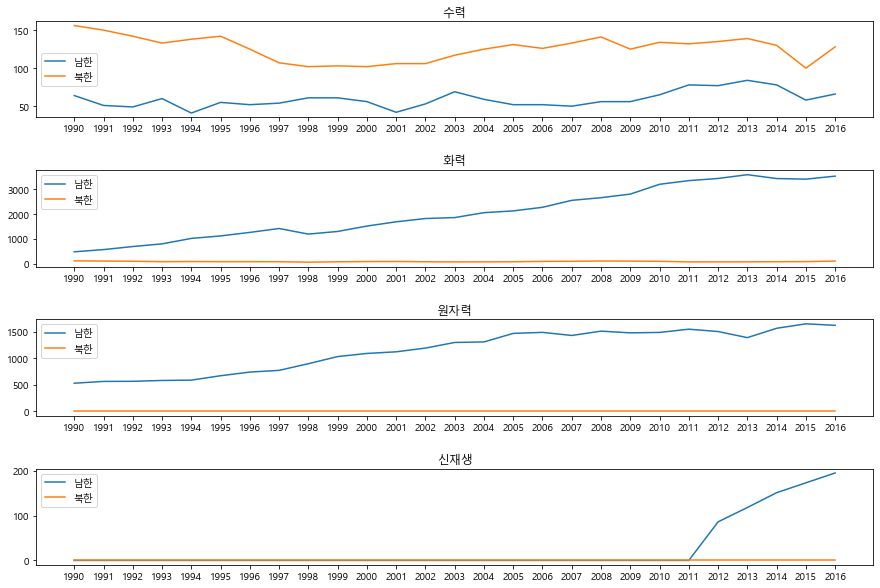

In [612]:
fig = plt.figure(figsize = (15,10))
fig.subplots_adjust(hspace=0.55)
for i , po in zip(range(len(enrg_south)) , enrg_south.index):
    globals()['area_{}'.format(i)] = fig.add_subplot(len(enrg_south) , 1 , i+1)
    globals()['area_{}'.format(i)].plot(enrg_south.loc[po].index , enrg_south.loc[po].values , label = '남한')
    globals()['area_{}'.format(i)].plot(enrg_north.loc[po].index , enrg_north.loc[po].values , label = '북한')
    globals()['area_{}'.format(i)].legend(loc = 'best')
    globals()['area_{}'.format(i)].set_title(po)
    
    
 

In [600]:
enrg_south.index

Index(['수력', '화력', '원자력', '신재생'], dtype='object', name='발전 전력별')

In [525]:
### globals()[] 동적 - 전역 변수 생성

In [523]:
for i in range(1,3):
    globals()['num_{}'.format(i)] = 0
    
print(num_1, num_2) # 0 0

0 0


In [ ]:
# subplot 생성시 변수를 생성하도록 하자.
fig = plt.figure(figsize = (20,10))
# 서브플롯 간격 조절
# plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.subplots_adjust(hspace=0.55)

# 1행 2열의 1번째 그래프
area01 = fig.add_subplot(3,1,1)
# 1행 2열의 2번째 그래프
area02 = fig.add_subplot(3,1,2)
# 1행 2열의 3번째 그래프
area03 = fig.add_subplot(3,1,3)


# subplot.set_title() 서브플롯 각각의 타이틀 설정
# subplot.set_xlabel , subplot.set_ylabel
for area , num  , color in zip(['충청남도' , '경상북도' , '전라남도'] , [area01 , area02 , area03] , ['red' , 'blue' , 'green']) :
    num.plot(seoul_frm.loc[area].index , seoul_frm.loc[area].values, marker = 'o' , label = area , c = color)
    num.set_xlabel('년도')
    num.set_ylabel('이동 인구수')
    num.set_title(area)
    num.legend(loc = 'best')
    num.set_xticklabels(labels = seoul_frm.columns.values , rotation = 75)
    
    
plt.show()
plt.close()

In [614]:
# ro rkxdms WKrtkfkd